# 1: Introduction

In this course, we've been creating plots using pyplot and matplotlib directly. When we want to explore a new dataset by quickly creating visualizations, using these tools directly can be cumbersome. Thankfully, pandas has many methods for quickly generating common plots from data in DataFrames. Like pyplot, the plotting functionality in pandas is a wrapper for matplotlib. This means we can customize the plots when necessary by accessing the underlying Figure, Axes, and other matplotlib objects.

In this guided project, we'll explore how using the pandas plotting functionality along with the Jupyter notebook interface allows us to explore data quickly using visualizations. If you're new to either our guided projects or Jupyter notebook in general, you can learn more here. You can find the solutions to this guided project here.

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

    Rank - Rank by median earnings (the dataset is ordered by this column).
    Major_code - Major code.
    Major - Major description.
    Major_category - Category of major.
    Total - Total number of people with major.
    Sample_size - Sample size (unweighted) of full-time.
    Men - Male graduates.
    Women - Female graduates.
    ShareWomen - Women as share of total.
    Employed - Number employed.
    Median - Median salary of full-time, year-round workers.
    Low_wage_jobs - Number in low-wage service jobs.
    Full_time - Number employed 35 hours or more.
    Part_time - Number employed less than 36 hours.

Using visualizations, we can start to explore questions from the dataset like:

    Do students in more popular majors make more money?
        Using scatter plots
    How many majors are predominantly male? Predominantly female?
        Using histograms
    Which category of majors have the most students?
        Using bar plots

We'll explore how to do these and more while primarily working in pandas. Before we start creating data visualizations, let's import the libraries we need and remove rows containing null values.


## Instructions

    Let's setup the environment by importing the libraries we need and running the necessary Jupyter magic so that plots are displayed inline.
        Import pandas and matplotlib into the environment.
        Run the Jupyter magic %matplotlib inline so that plots are displayed inline.

    Read the dataset into a DataFrame and start exploring the data.
        Read recent-grads.csv into pandas and assign the resulting DataFrame to recent_grads.
        Use DataFrame.iloc[] to return the first row formatted as a table.
        Use DataFrame.head() and DataFrame.tail() to become familiar with how the data is structured.
        Use DataFrame.describe() to generate summary statistics for all of the numeric columns.

    Drop rows with missing values. Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors.

In [1]:
import pandas as pd
%matplotlib inline

recent_grads= pd.read_csv( "../data/recent-grads.csv")

In [103]:
# drop null values, we don't want them
recent_grads = recent_grads.dropna()
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


## Doing very simple test ..

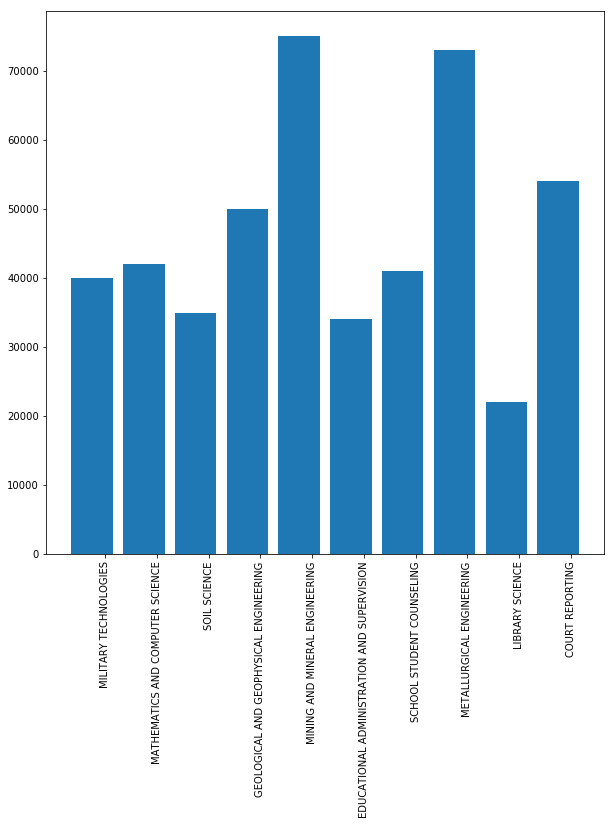

In [76]:
# Explore what is the salary of maximum opted courses

import matplotlib.pyplot as plt
from numpy import arange

# create figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

# extract some subset of data, and sort
max_sal = recent_grads [ [ 'Total', 'Major', 'Median', 'Major_category' ]  ]
max_sal = max_sal.sort_values( 'Total' )

tick_positions = range(1,11)

# get top 10 popular coursers
top_10_popular = max_sal[0:10]
bar_positions = arange(10) + 0.75

course_name = top_10_popular['Major']

ax.bar( bar_positions, top_10_popular['Median'] )
ax.set_xticks( tick_positions )
ax.set_xticklabels( course_name, rotation=90 )
plt.show()

## Which category of majors have most students ?

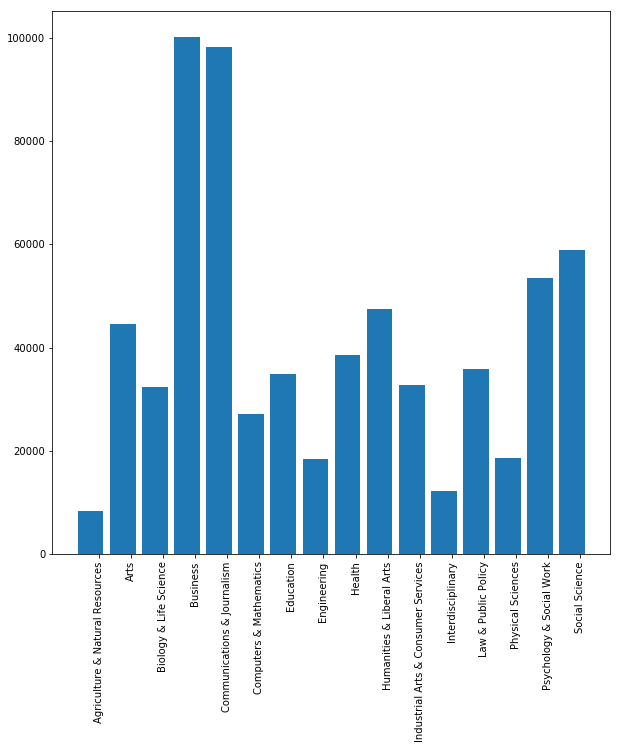

In [88]:
# I love bar charts
# which category of majors have most students 
# aggregate the data with Major_category and get the sum of total students, pivot tables 
# plot the whole thing

max_sal_by_category = recent_grads [ [ 'Total', 'Major', 'Median', 'Major_category' ]  ]
pivot_table = max_sal_by_category.pivot_table( index='Major_category', values='Total' )

# create figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

tick_positions = range(1,len( pivot_table ) + 1)

# get top 10 popular coursers
bar_positions = arange( len( pivot_table )) + 0.75

major_name = pivot_table.index;

ax.bar( bar_positions, pivot_table.values )
ax.set_xticks( tick_positions )
ax.set_xticklabels( major_name, rotation=90 )
plt.show()


## Do students in more popular majors make more money?

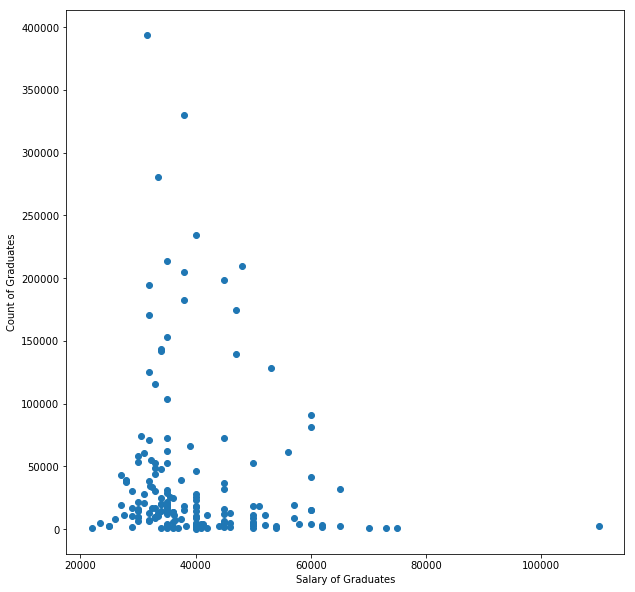

In [90]:
# Do students in more popular majors make more money?
# Using scatter plots

#recent_grads
# create figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

ax.scatter( recent_grads['Median'], recent_grads['Total'] )
ax.set_xlabel( "Salary of Graduates")
ax.set_ylabel( "Count of Graduates")
plt.show()

## How many majors are predominantly male? Predominantly female?

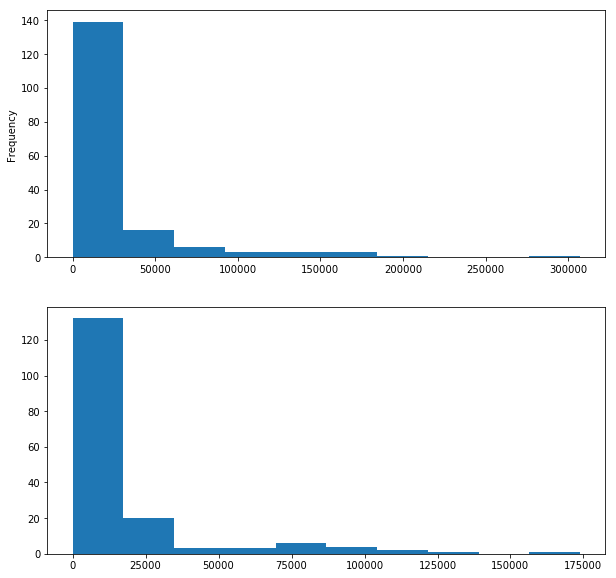

In [102]:
# How many majors are predominantly male? Predominantly female
# Using histograms

# create figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

list_women = recent_grads['Women']

ax.set_ylabel("Frequency" )
ax.hist(recent_grads['Women'], bins=10, range=(0, 307087))
ax2.hist( recent_grads['Men'], bins=10, range=(0, max( recent_grads['Men'] ) ) )
plt.show()

# 2: Pandas, Scatter Plots

Most of the plotting functionality in pandas is contained within the DataFrame.plot() method. When we call this method, we specify the data we want plotted as well as the type of plot. We use the kind parameter to specify the type of plot we want. We use x and y to specify the data we want on each axis. You can read about the different parameters in the documentation.

    recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')

If you create a new cell in jupyter notebook and run the above code, the scatter plot will be displayed immediately. This functionality is a byproduct of running the jupyter magic %matplotlib inline. This means we can write one line of code to generate a scatter plot, run the cell using a keyboard shortcut, inspect the plot, and repeat. The DataFrame.plot() method has a few parameters we can use for tweaking the scatter plot:

    recent_grads.plot(x='Sample_size', y='Employed', kind='scatter', title='Employed vs. Sample_size', figsize=(5,10))

We can access the underlying matplotlib Axes object by assigning the return value to a variable:

    ax = recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')

    ax.set_title('Employed vs. Sample_size')

When you run the code above in a jupyter notebook cell, the plot will be returned inline just like before.

## Instructions

    Generate scatter plots in separate jupyter notebook cells to explore the following relations:
        Sample_size and Median
        Sample_size and Unemployment_rate
        Full_time and Median
        ShareWomen and Unemployment_rate
        Men and Median
        Women and Median
    Use the plots to explore the following questions:
        Do students in more popular majors make more money?
        Do students that majored in subjects that were majority female make more money?
        Is there any link between the number of full-time employees and median salary?


# Plotting from data frame directly

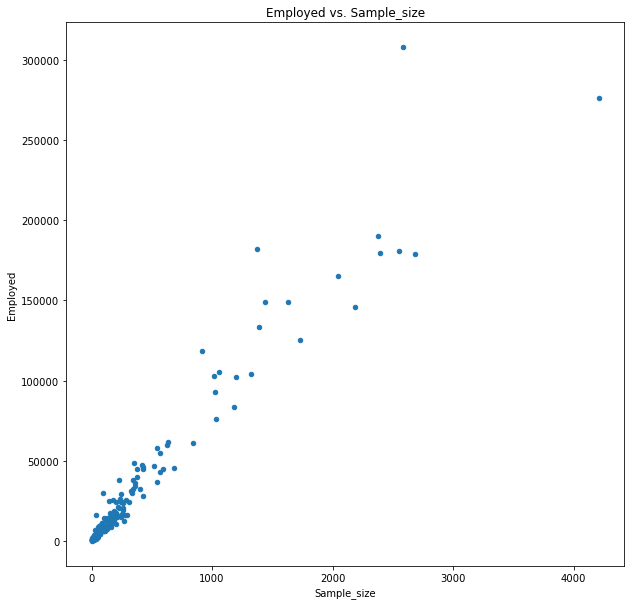

In [106]:
ax = recent_grads.plot( x='Sample_size', y='Employed', kind='scatter', figsize=(10,10))
ax.set_title( 'Employed vs. Sample_size' )

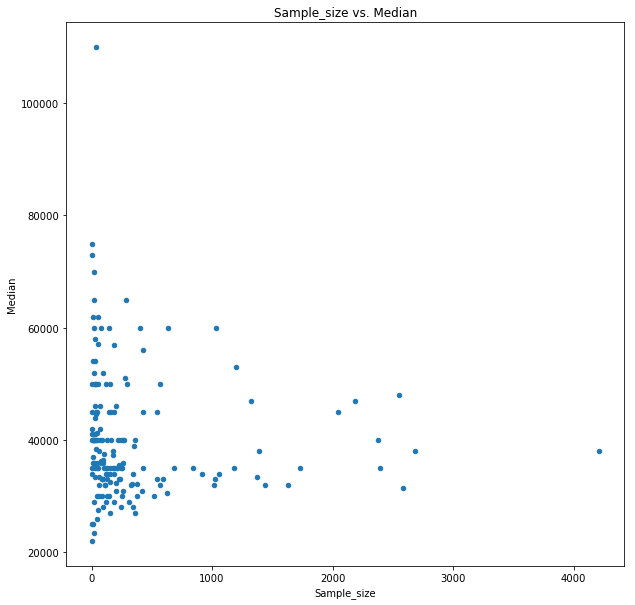

In [107]:
ax = recent_grads.plot( x='Sample_size', y='Median', kind='scatter', figsize=(10,10))
ax.set_title( 'Sample_size vs. Median' )

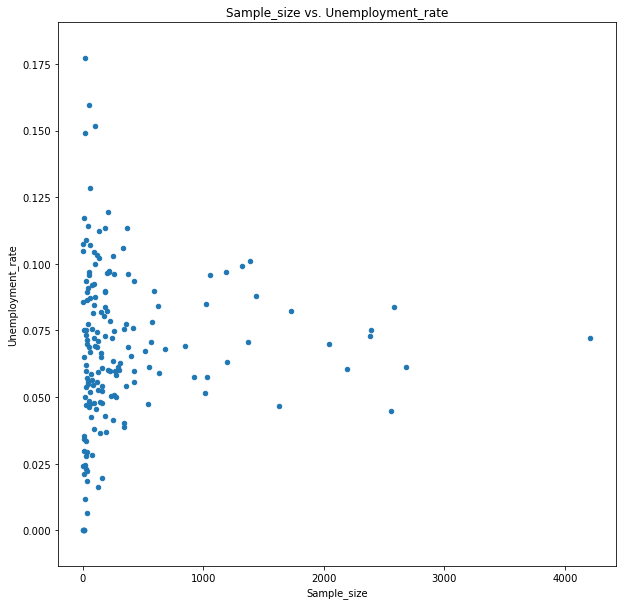

In [108]:
ax = recent_grads.plot( x='Sample_size', y='Unemployment_rate', kind='scatter', figsize=(10,10))
ax.set_title( 'Sample_size vs. Unemployment_rate' )

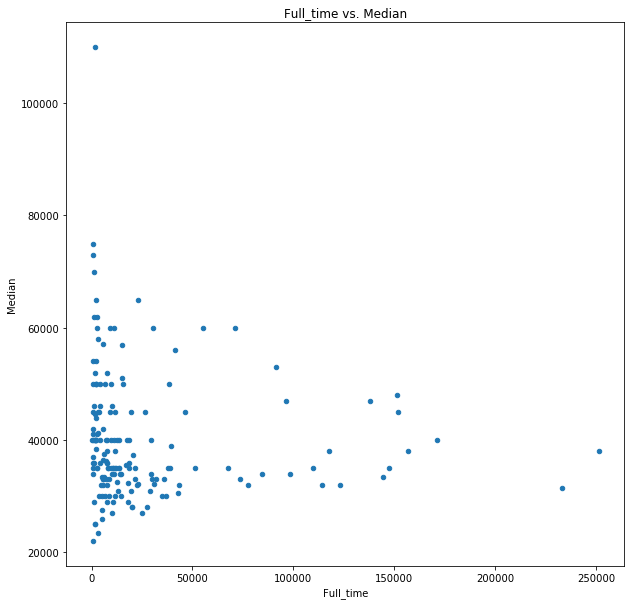

In [109]:
ax = recent_grads.plot( x='Full_time', y='Median', kind='scatter', figsize=(10,10))
ax.set_title( 'Full_time vs. Median' )

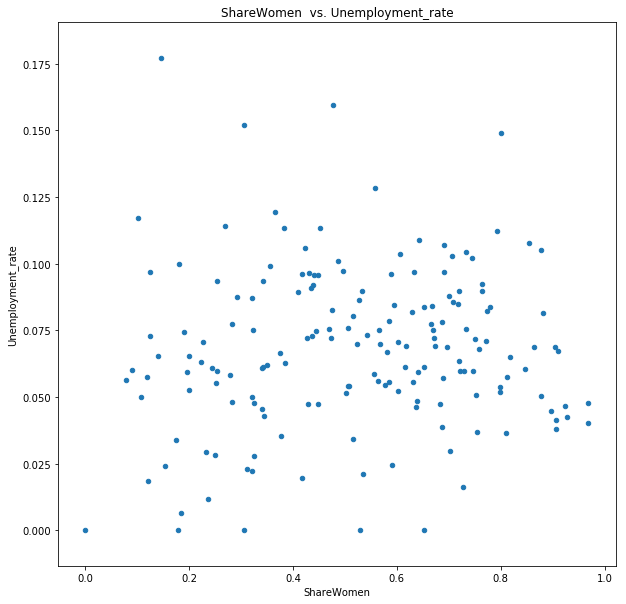

In [111]:
ax = recent_grads.plot( x='ShareWomen', y='Unemployment_rate', kind='scatter', figsize=(10,10))
ax.set_title( 'ShareWomen  vs. Unemployment_rate' )

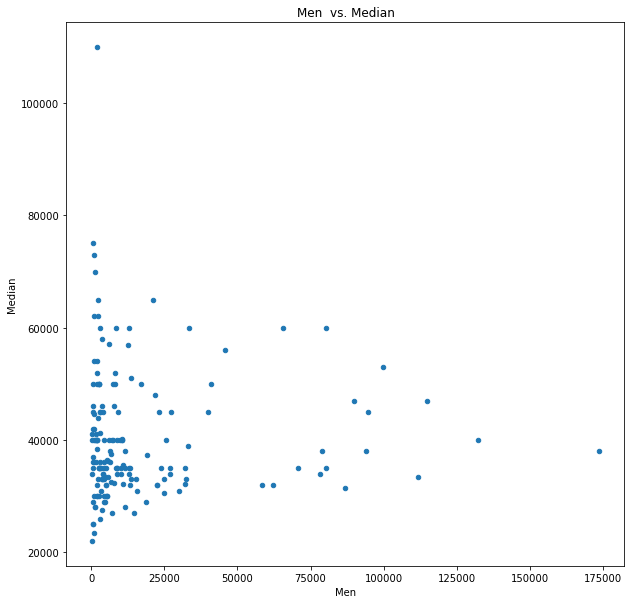

In [112]:
ax = recent_grads.plot( x='Men', y='Median', kind='scatter', figsize=(10,10))
ax.set_title( 'Men  vs. Median' )

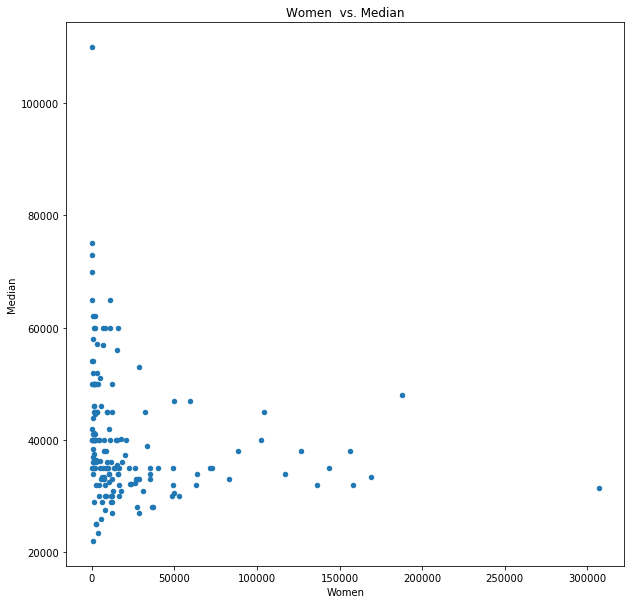

In [114]:
ax = recent_grads.plot( x='Women', y='Median', kind='scatter', figsize=(10,10))
ax.set_title( 'Women  vs. Median' )

# 3: Pandas, Histograms

To explore the distribution of values in a column, we can select it from the DataFrame, call Series.plot(), and set the kind parameter to hist:

    recent_grads['Sample_size'].plot(kind='hist')

The DataFrame.plot() and Series.plot() methods have many of the same parameters but are used for different use cases. We use Series.plot() to plot a specific column and DataFrame.plot() to generate plots that use values from multiple columns. For example, because scatter plots are generated using 2 sets of values (one for each axis), we can't create a scatter plot using Series.plot().

Unfortunately, Series.plot() doesn't contain parameters for tweaking a histogram because it was implemented to handle generating standard plots with default settings quickly. If we want to control the binning strategy of a histogram, we should use Series.hist() instead, which contains parameters specific to customizing histograms:

    recent_grads['Sample_size'].hist(bins=25, range=(0,5000))

Instructions

    Generate histograms in separate jupyter notebook cells to explore the distributions of the following columns:
        Sample_size
        Median
        Employed
        Full_time
        ShareWomen
        Unemployment_rate
        Men
        Women
    We encourage you to experiment with different bin sizes and ranges when generating these histograms.
    Use the plots to explore the following questions:
        What percent of majors are predominantly male? Predominantly female?
        What's the most common median salary range?


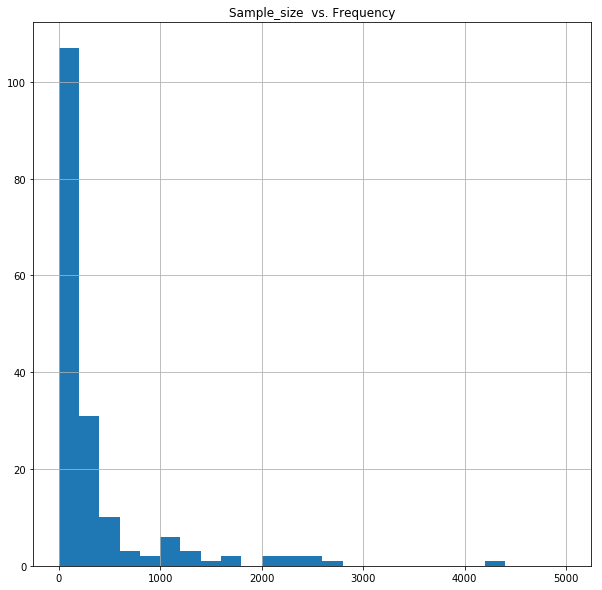

In [4]:
ax = recent_grads['Sample_size'].hist(bins=25, range=(0,5000), figsize=(10,10))
ax.set_title( 'Sample_size  vs. Frequency' )

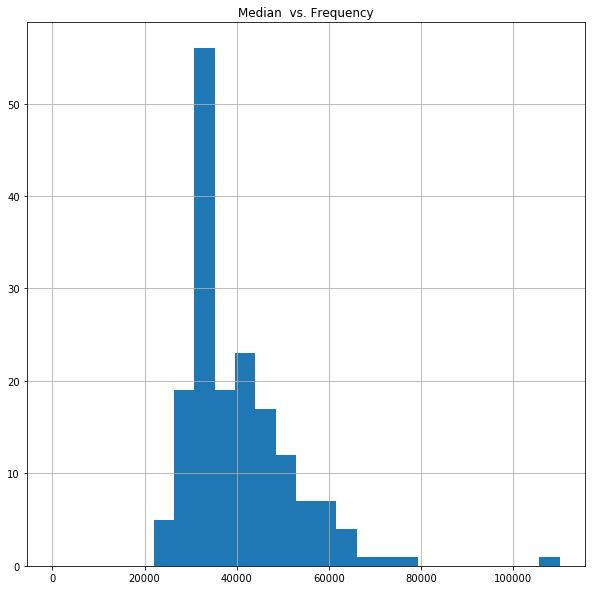

In [6]:
ax = recent_grads['Median'].hist(bins=25, range=(0,max(recent_grads['Median'] )), figsize=(10,10))
ax.set_title( 'Median  vs. Frequency' )

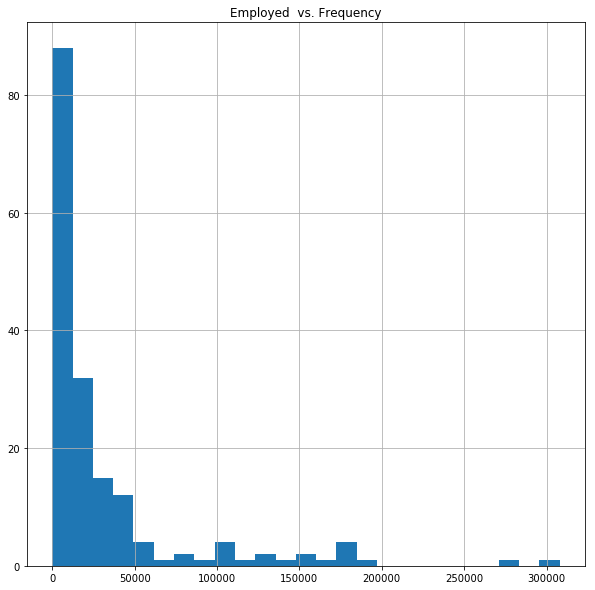

In [7]:
ax = recent_grads['Employed'].hist(bins=25, range=(0,max(recent_grads['Employed'] )), figsize=(10,10))
ax.set_title( 'Employed  vs. Frequency' )

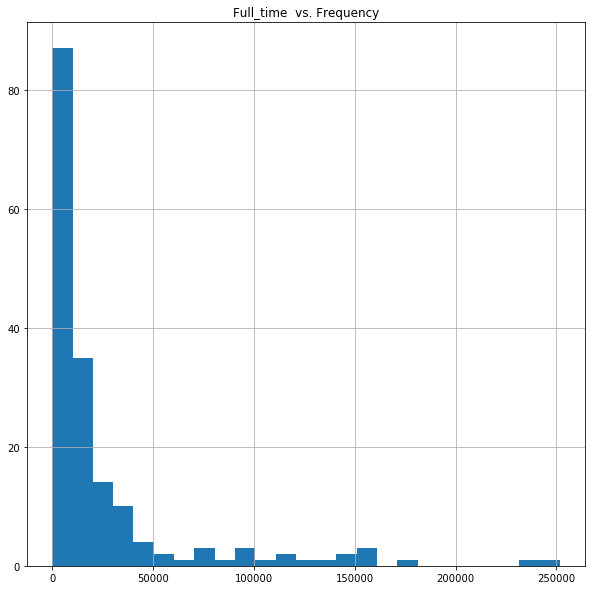

In [16]:
ax = recent_grads['Full_time'].hist(bins=25, range=(0,max(recent_grads['Full_time'] )), figsize=(10,10))
ax.set_title( 'Full_time  vs. Frequency' )

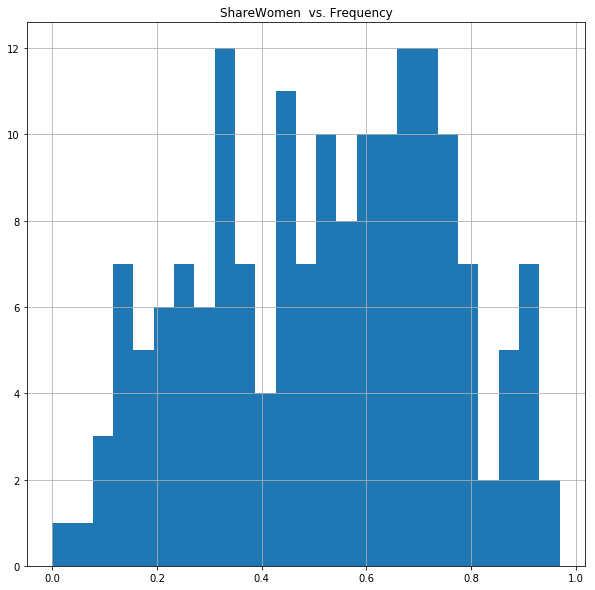

In [11]:

ax2 = recent_grads['ShareWomen'].hist(bins=25, range=(0,max(recent_grads['ShareWomen'] )), figsize=(10,10))
ax2.set_title( 'ShareWomen  vs. Frequency' )

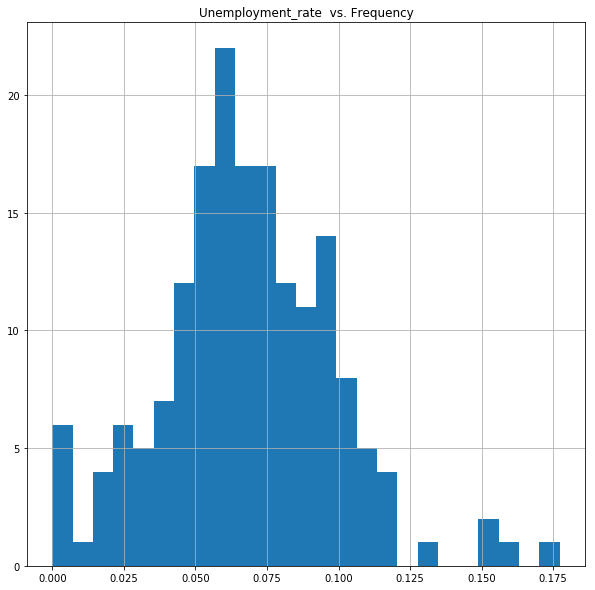

In [12]:
ax2 = recent_grads['Unemployment_rate'].hist(bins=25, range=(0,max(recent_grads['Unemployment_rate'] )), figsize=(10,10))
ax2.set_title( 'Unemployment_rate  vs. Frequency' )

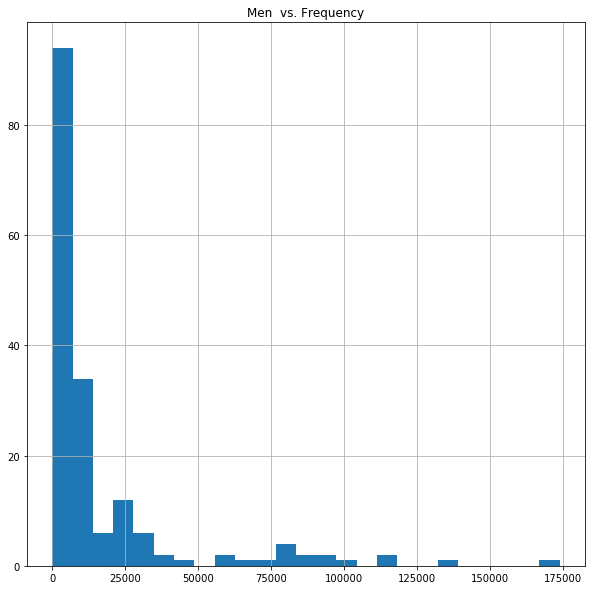

In [13]:

ax2 = recent_grads['Men'].hist(bins=25, range=(0,max(recent_grads['Men'] )), figsize=(10,10))
ax2.set_title( 'Men  vs. Frequency' )

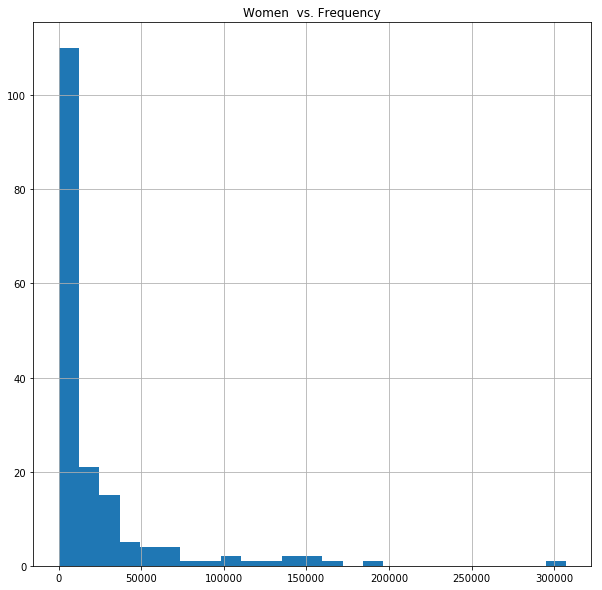

In [14]:

ax2 = recent_grads['Women'].hist(bins=25, range=(0,max(recent_grads['Women'] )), figsize=(10,10))
ax2.set_title( 'Women  vs. Frequency' )

# 4: Pandas, Scatter Matrix Plot

In the last 2 steps, we created individual scatter plots to visualize potential relationships between columns and histograms to visualize the distributions of individual columns. A scatter matrix plot combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions simultaneously. A scatter matrix plot consists of n by n plots on a grid, where n is the number of columns, the plots on the diagonal are histograms, and the non-diagonal plots are scatter plots.

<img src="scatterplot_matrix_intro.png">

Because scatter matrix plots are frequently used in the exploratory data analysis, pandas contains a function named scatter_matrix() that generates the plots for us. This function is part of the pandas.tools.plotting module and needs to be imported separately. To generate a scatter matrix plot for 2 columns, select just those 2 columns and pass the resulting DataFrame into the scatter_matrix() function.

    scatter_matrix(recent_grads[['Women', 'Men']], figsize=(10,10))

While passing in a DataFrame with 2 columns returns a 2 by 2 scatter matrix plot (4 plots total), passing in one with 3 returns a 3 by 3 scatter matrix plot (9 plots total). This means that the number of plots generated scales exponentially by a factor of 2, not linearly. If you increase the number of columns to 4 or more, the resulting grid of plots becomes unreadable and difficult to interpret (even if you increase the plotting area using the figsize parameter).

Unfortunately, the documentation for scatter_matrix() is missing from the pandas website. If you want to read more about the parameters the function accepts, read the comments in the source code for the function.

## Instructions

    Import scatter_matrix from pandas.tools.plotting
    Create a 2 by 2 scatter matrix plot using the Sample_size and Median columns.
    Create a 3 by 3 scatter matrix plot using the Sample_size, Median, and Unemployment_rate columns.
    Explore the questions from the last few steps using these scatter matrix plots. You may need to create more scatter matrix plots.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2868151510>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2867fc7410>]], dtype=object)

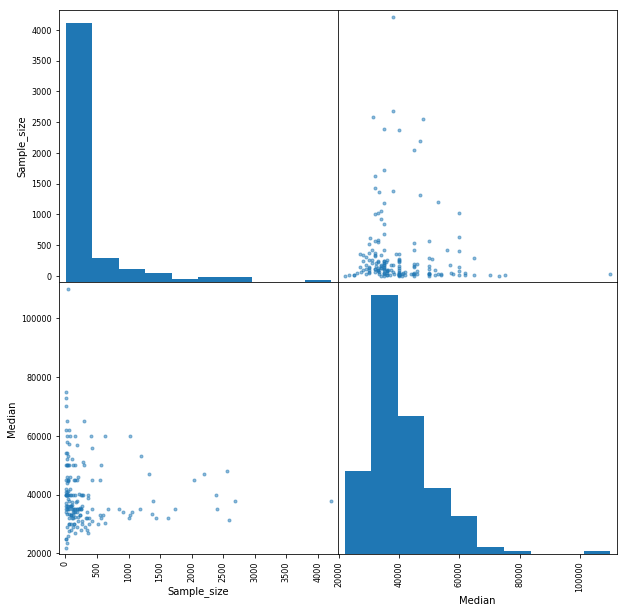

In [19]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2868310f50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2867a9a5d0>]], dtype=object)

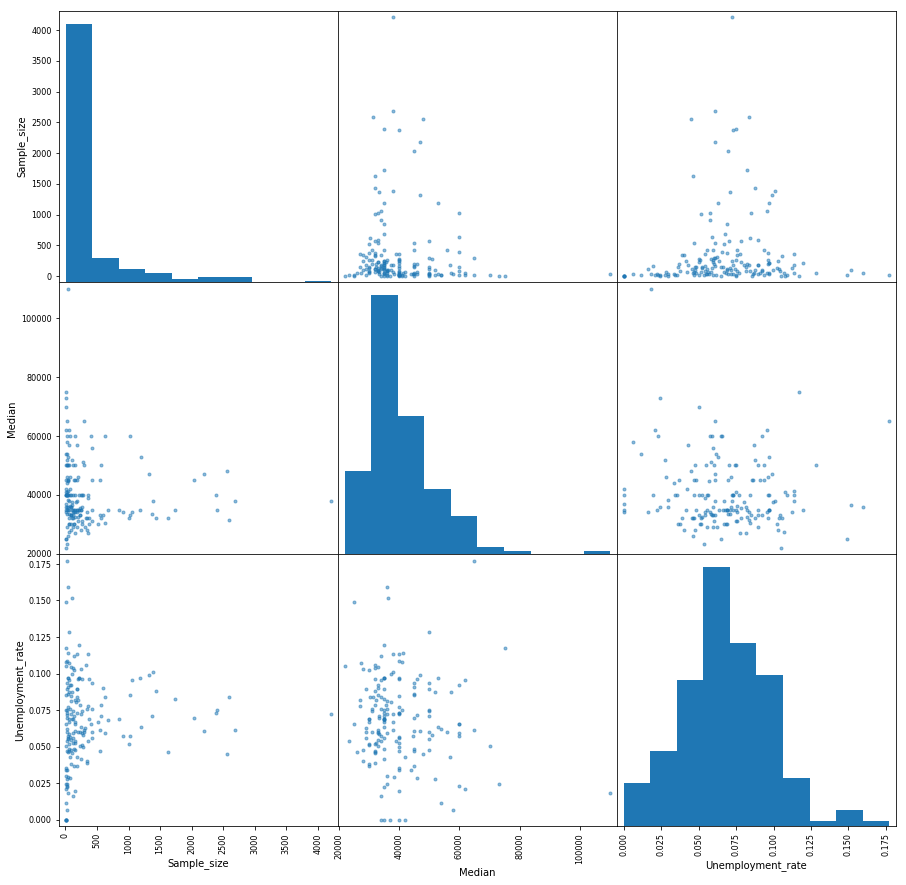

In [20]:
scatter_matrix(recent_grads[['Sample_size', 'Median','Unemployment_rate']], figsize=(15,15))

# 5: Pandas, Bar Plots

To create bar plots in matplotlib, we had to specify many aspects of the bar plot ourselves. We had to specify the locations, labels, lengths, and widths of the bars. When creating bar plots using pandas, we only need specify the data we want the bars to represent and the labels for each bar. The following code returns a bar plot of the first 5 values in the Women column:

    recent_grads[:5]['Women'].plot(kind='bar')

By default, pandas will use the default labels on the x-axis for each bar (1 to n) from matplotlib. If we instead use the DataFrame.plot.bar() method, we can use the x parameter to specify the labels and the y parameter to specify the data for the bars:

    recent_grads[:5].plot.bar(x='Major', y='Women')

## Instructions

    Use bar plots to compare the percentages of women (ShareWomen) from the 10 highest paying majors and from the 10 lowest paying majors.
    Use bar plots to compare the unemployment rate (Unemployment_rate) from the 10 highest paying majors and from the 10 lowest paying majors.


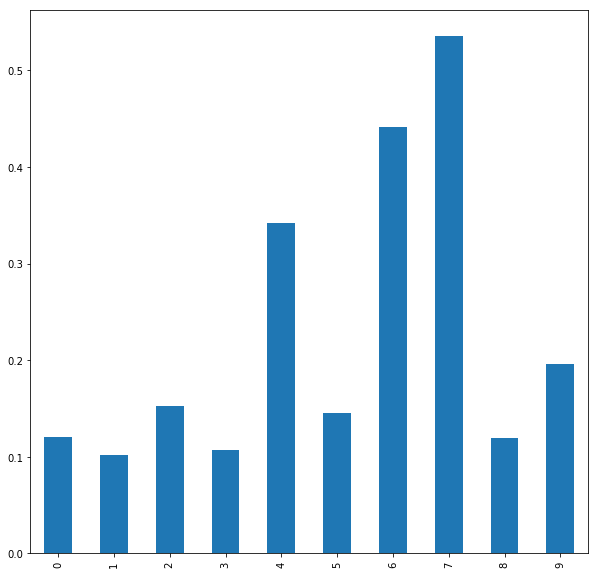

In [24]:
recent_grads[:10]['ShareWomen'].plot(kind='bar', figsize=(10,10) )

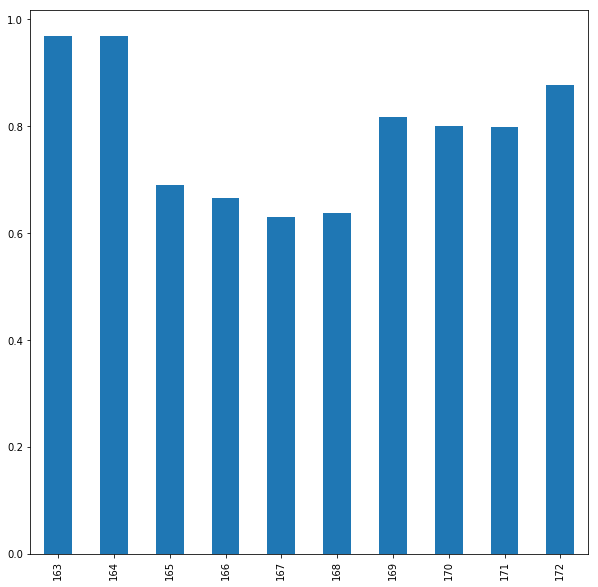

In [25]:
recent_grads[-10:]['ShareWomen'].plot(kind='bar', figsize=(10,10) )

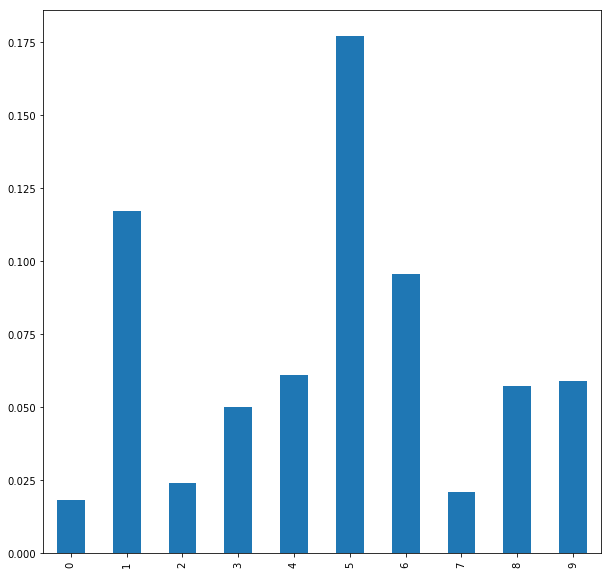

In [26]:
recent_grads[:10]['Unemployment_rate'].plot(kind='bar', figsize=(10,10) )

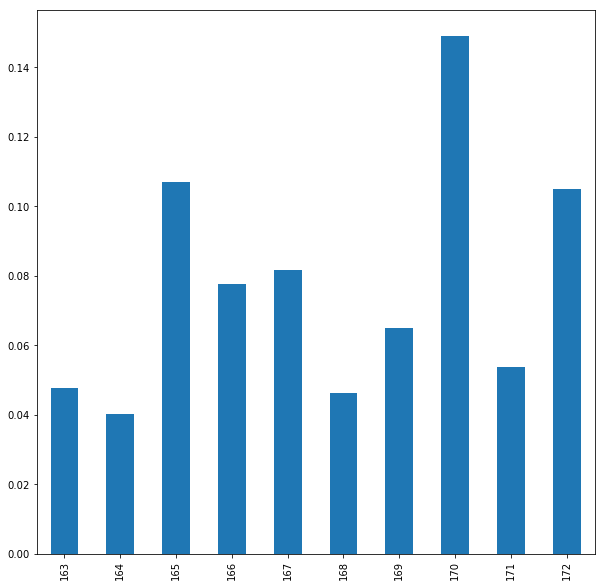

In [27]:
recent_grads[-10:]['Unemployment_rate'].plot(kind='bar', figsize=(10,10) )

# 6: Next steps

In this guided project, we learned how to use the plotting tools built into pandas to explore data on job outcomes. If you head over to the documentation http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html on plotting in pandas, you'll notice that there's built in support for many more plots.

We encourage you to keep exploring these other visualizations on your own. Here are some ideas:

    Use a grouped bar plot to compare the number of men with the number of women in each category of majors.
    Use a box plot to explore the distributions of median salaries and unemployment rate.
    Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project